In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns



# Inspect the data
The data has been saved as a dataframe named heart in script.py. It contains the following variables:

`age`: age in years

`sex`: sex assigned at birth; 'male' or 'female'

`trestbps`: resting blood pressure in mm Hg

`chol`: serum cholesterol in mg/dl

`cp`: chest pain type ('typical angina', 'atypical angina', 'non-anginal pain', or 'asymptomatic')

`exang`: whether the patient experiences exercise-induced angina (1: yes; 0: no)

`fbs`: whether the patient’s fasting blood sugar is >120 mg/dl (1: yes; 0: no)

`thalach`: maximum heart rate achieved in exercise test

cp`: chest pain type ('typical angina', 'atypical angina', 'non-anginal pain', or 'asymptomatic')

`exang`: whether the patient experiences exercise-induced angina (1: yes; 0: no)

`fbs`: whether the patient’s fasting blood sugar is >120 mg/dl (1: yes; 0: no)

`thalach`: maximum heart rate achieved in exercise test

`heart_disease`: whether the patient is found to have heart disease ('presence': diagnosed with heart disease; 'absence': no heart disease)

In [2]:
df = pd.read_csv('heart_disease.csv')
df.head()

,age,sex,trestbps,chol,cp,exang,fbs,thalach,heart_disease
0,63.0,male,145.0,233.0,typical angina,0.0,1.0,150.0,absence
1,67.0,male,160.0,286.0,asymptomatic,1.0,0.0,108.0,presence
2,67.0,male,120.0,229.0,asymptomatic,1.0,0.0,129.0,presence
3,37.0,male,130.0,250.0,non-anginal pain,0.0,0.0,187.0,absence
4,41.0,female,130.0,204.0,atypical angina,0.0,0.0,172.0,absence


# Predictors of heart disease

Each of the patients in this dataset underwent an exercise test, during which their heart rate was monitored. For each patient, thalach gives us the highest heart rate that the patient achieved during this test.

ch of the patients in this dataset underwent an exercise test, during which their heart rate was monitored. For each patient, thalach gives us the highest heart rate that the patient achieved during this test.

Is thalach associated with whether or not a patient will ultimately be diagnosed with heart disease? Use `sns.boxplot()` to plot side by side box plots of thalach for patients who were and were not diagnosed with heart disease (indicated by the heart_disease variable). Do you think there is a relationship between these variables?

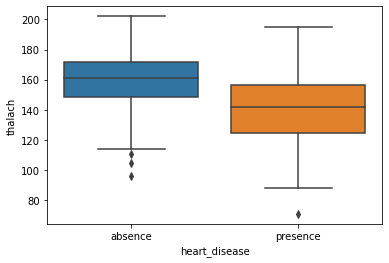

In [21]:
sns.boxplot(y = df.thalach, x = df.heart_disease)
plt.show()

** Response **:It looks like there is a relation between the maximum heart rate and a heart disease.

In order to investigate this question further, save the values for thalach among patients who were diagnosed with heart disease as a variable named `thalach_hd`. Then save the values of thalach among patients who were not diagnosed with heart disease as `thalach_no_hd`.

Calculate and print the difference in mean thalach for patients diagnosed with heart disease compared to patients without heart disease. Then do the same for the median difference.

In [8]:
thalach_no_hd = df.thalach[df.heart_disease == 'absence']
thalach_hd = df.thalach[df.heart_disease == 'presence']
mean_diff = np.mean(thalach_no_hd) - np.mean(thalach_hd)
print(mean_diff)
median_diff = np.median(thalach_no_hd) - np.median(thalach_hd)
print(median_diff)


19.11905597473242
19.0


We’d like to find out if the average thalach of a heart disease patient is significantly different from the average thalach for a person without heart disease.

Import the statistical test from `scipy.stats` that we would use to test the following null and alternative hypotheses:

Null: The average `thalach` for a person with heart disease is equal to the average `thalach` for a person without heart disease.
’d like to find out if the average thalach of a heart disease patient is significantly different from the average thalach for a person without heart disease.

Import the statistical test from `scipy.stats` that we would use to test the following null and alternative hypotheses:

Null: The average `thalach` for a person with heart disease is equal to the average `thalach` for a person without heart disease.

Alternative: The average `thalach` for a person with heart disease is NOT equal to the average `thalach` for a person without heart disease.

** Response **

We can test an association between a quantitative variable and a binary categorical variable by using a two-sample t-test. The null hypothesis for a two-sample t-test is that the difference in group means is equal to zero. A two-sample t-test can be implemented in Python using the `ttest_ind()` function from
 Response **

We can test an association between a quantitative variable and a binary categorical variable by using a two-sample t-test. The null hypothesis for a two-sample t-test is that the difference in group means is equal to zero. A two-sample t-test can be implemented in Python using the `ttest_ind()` function from
`scipy.stats` 


In [17]:
from scipy.stats import ttest_ind

In [20]:
tstat, pval = ttest_ind(thalach_no_hd, thalach_hd)
pval

3.456964908430172e-14

The p value obtained is sigficative lower than 0.05. * Therefore the null hypothesis is rejected. *

Using the same process, investigate at least one other quantitative variable. Options include `age`, `trestbps` (resting blood pressure), and `chol` (cholesterol). Are any of these variables also significantly associated with heart disease?

## Relation between cholesterol and heart disease

First we are going to plot the values of cholesterol (quantitative variable) vs heart disease (binary categorical variable)

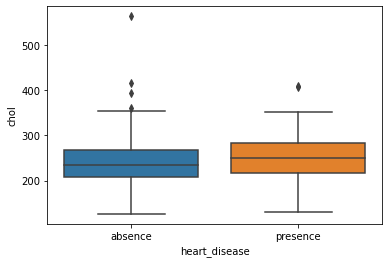

In [23]:
plt.clf()
sns.boxplot(y=df.chol, x = df.heart_disease)
plt.show()

### Two sample test


In [26]:
chol_no_hd = df.chol[df.heart_disease == 'absence']
chol_hd = df.chol[df.heart_disease == 'presence']
mean_diff = np.mean(chol_no_hd) - np.mean(chol_hd)
print(mean_diff)
median_diff = np.median(chol_no_hd) - np.median(chol_hd)
print(median_diff)

-8.834576241445887
-14.5


Both median and mean of cholesterol levels are lower in the case of individuals without heart disease. But are these difference significant.

Null: The average `chol` for a person with heart disease is equal to the average `chol` for a person without heart disease.

Alternative: The average `chol` for a person with heart disease is NOT equal to the average `chol` for a person without heart disease.

In [27]:
tstat, pval = ttest_ind(chol_no_hd, chol_hd)
pval

0.13914167020436527

At a significance p value of 0.05 the null hypothesis can not be rejected.